In [85]:
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=30)

In [86]:
import matplotlib.pyplot as plt

# Perceptron With Step Function

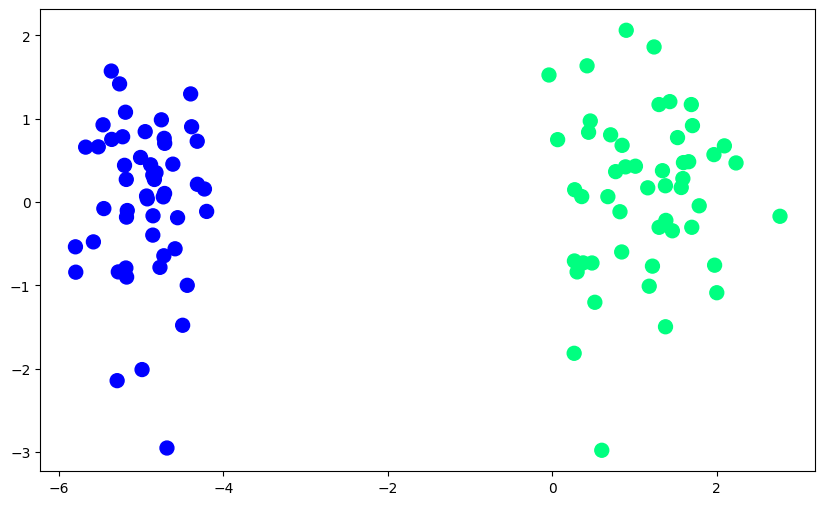

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1],c=y, cmap='winter', s=100)

In [88]:
def perceptorn_step(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights += lr * (y[j] - y_hat) * X[j]

    return weights[0], weights[1:]

In [89]:
def step(z):
    return 1 if  z > 0 else 0

In [90]:
step_intercept_, step_coef_ = perceptorn_step(X, y)

In [91]:
print(step_intercept_)
print(step_coef_)


1.3000000000000003
[1.1134548  0.33857969]


In [92]:
m_step = -(step_coef_[0]/step_coef_[1])
b_step = -(step_intercept_/step_coef_[1])

In [93]:
x_input = np.linspace(-3,3,100)
y_input = m_step*x_input + b_step

(-3.0, 2.0)

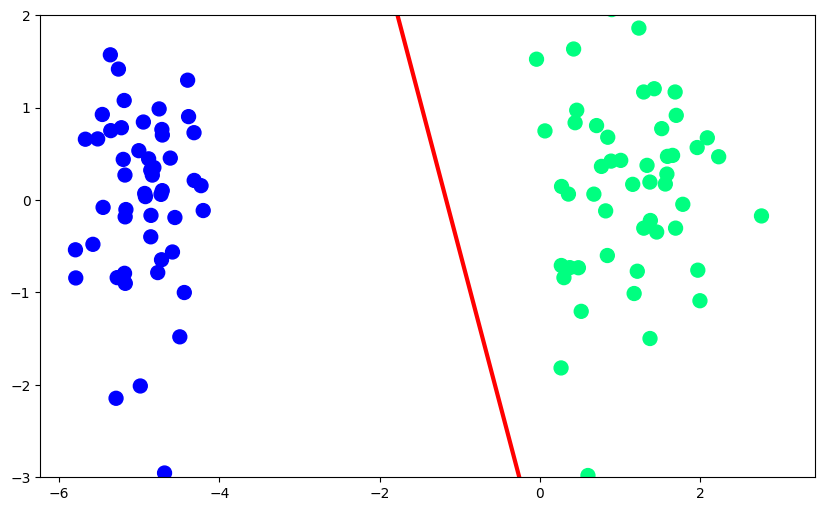

In [94]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## Animation

In [95]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [96]:
m,b = perceptron(X,y)

In [97]:
%matplotlib inline

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation


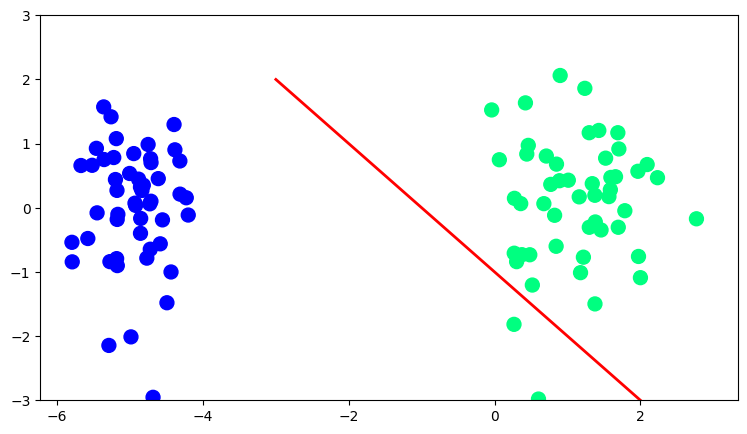

In [98]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    # label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    return line, ax

anim = FuncAnimation(fig, update, frames=200, interval=100, blit=False)
plt.show()

# Perceptron With Sigmoid Function

In [99]:
def perceptorn_sig(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = sigmoid(np.dot(X[j], weights))
        weights += lr * (y[j] - y_hat) * X[j]

    return weights[0], weights[1:]

In [100]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [101]:
sig_intercept_, sig_coef_ = perceptorn_sig(X, y)

In [102]:
print(sig_intercept_)
print(sig_coef_)

2.62806709185532
[2.30701093 0.20882908]


In [103]:
m_sig = -(sig_coef_[0]/sig_coef_[1])
b_sig = -(sig_intercept_/sig_coef_[1])

In [104]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m_sig*x_input1 + b_sig

(-3.0, 2.0)

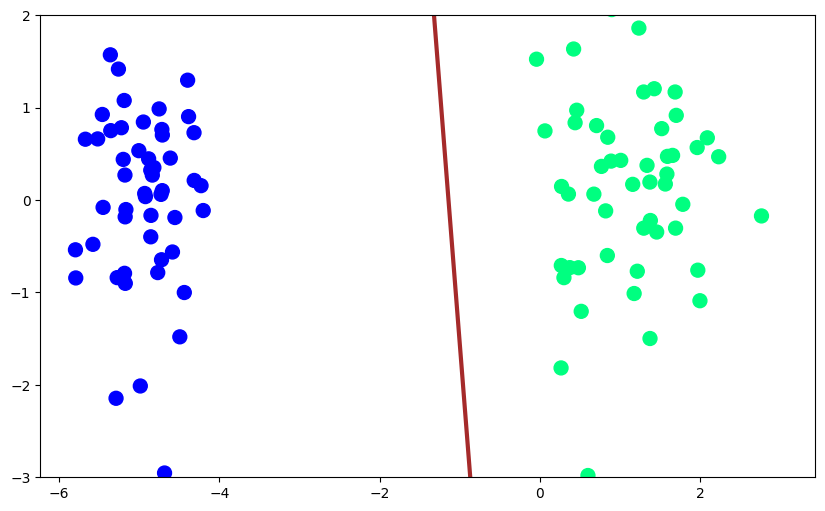

In [105]:
plt.figure(figsize=(10,6))
plt.plot(x_input1,y_input1,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Using Gradient Descent

In [106]:
class LogisticRegression_gd:

    def __init__(self, learning_rate=0.5, epochs=1500):
        self.intercept_ = None
        self.coef_ = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        weights = np.ones(X_train.shape[1])
    
        for i in range(self.epochs):
            y_hat = sigmoid(np.dot(X_train, weights))
            weights += (self.learning_rate * np.dot((y_train - y_hat), X_train)) / X_train.shape[0]
    
        self.coef_ = weights[1:]
        self.intercept_ = weights[0]

    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

In [107]:
gd = LogisticRegression_gd(0.4, 20000)
gd.fit(X, y)
gd_coef_ = gd.coef_
gd_intercept_ = gd.intercept_

In [108]:
m_gd = -(gd_coef_[0]/gd_coef_[1])
c_gd = -(gd_intercept_/gd_coef_[1])

In [109]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m_gd*x_input2 + c_gd

(-3.0, 2.0)

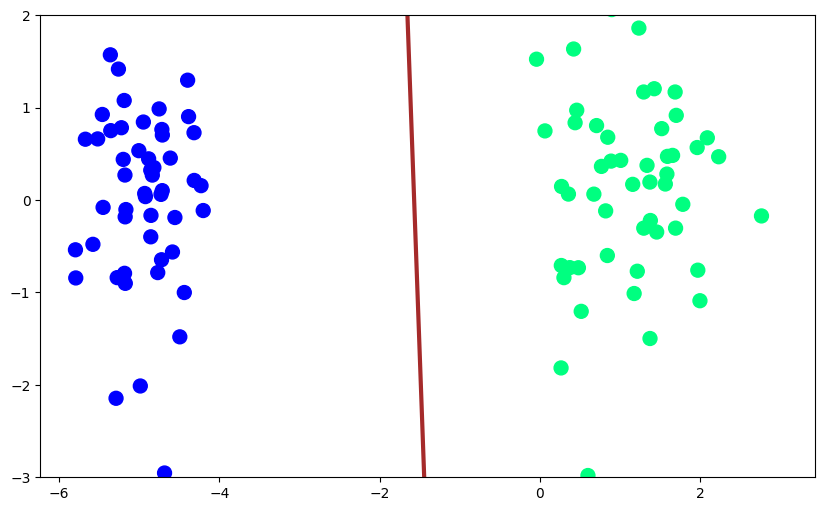

In [110]:
plt.figure(figsize=(10,6))
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Sklearn Logisticregression

## Normal

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [113]:
print(lor.coef_)
print(lor.intercept_)


[[1.77255101 0.01190507]]
[3.54700273]


In [114]:
m_lor = -(lor.coef_[0][0]/lor.coef_[0][1])
b_lor = -(lor.intercept_/lor.coef_[0][1])

In [115]:
x_input3 = np.linspace(-3,3,100)
y_input3 = m_lor*x_input3 + b_lor

(-3.0, 2.0)

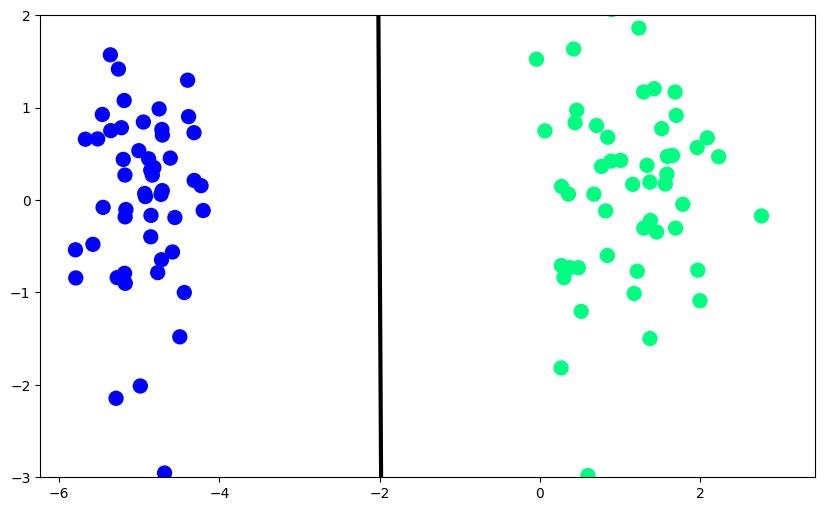

In [116]:
plt.figure(figsize=(10,6))
plt.plot(x_input3,y_input3,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## GradientDescent 

In [117]:
lr_gd = LogisticRegression(penalty=None, solver='sag')
lr_gd.fit(X, y)

C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [118]:
print(lr_gd.coef_)
print(lr_gd.intercept_)

[[3.91776252 0.16418947]]
[4.17644203]


In [119]:
m_lr_gd = -(lr_gd.coef_[0][0]/lr_gd.coef_[0][1])
b_lr_gd = -(lr_gd.intercept_/lr_gd.coef_[0][1])

In [120]:
x_input4 = np.linspace(-3,3,100)
y_input4 = m_lr_gd*x_input4 + b_lr_gd

(-3.0, 2.0)

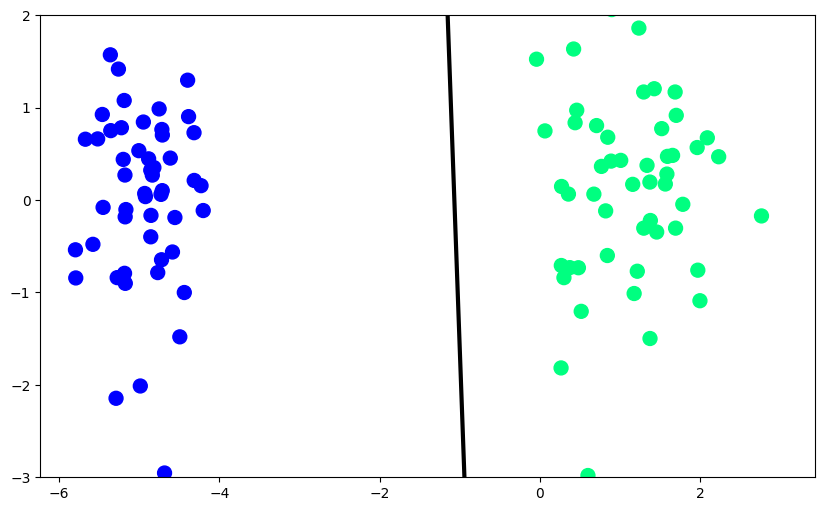

In [121]:
plt.figure(figsize=(10,6))
plt.plot(x_input4,y_input4,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Comparision

(-3.0, 2.0)

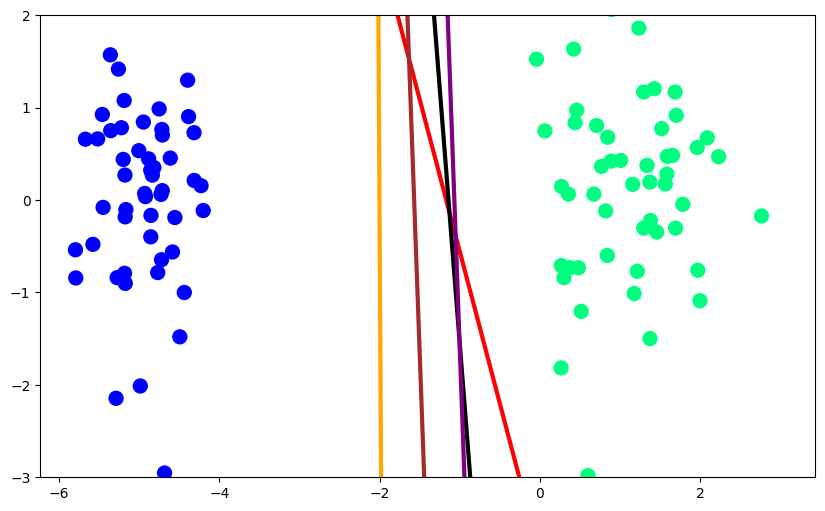

In [124]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.plot(x_input3,y_input3,color='orange',linewidth=3)
plt.plot(x_input4,y_input4,color='purple',linewidth=3)

plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)